# **Objective**
## To analyze the Bitcoin Market Sentiment Data from 2018-2025 timeline
---


## **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## **Loading the Dataset**

In [9]:
df1 = pd.read_csv(r"D:\Internship_Tasks\Trader_Market_Relationship\Datasets\fear_greed_index - fear_greed_index.csv")
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## **Exploratory Data Analysis**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


### **Insights**
- No null values present which is a good thing.
- Total number of data points: 2644
---

In [5]:
print("Unique values in 'classification' and their count:")
df1["classification"].value_counts()

Unique values in 'classification' and their count:


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

### **Insights**
- We can see that 'Fear' is the dominating market sentiment followed by 'Greed' and 'Extreme Fear', whereas 'Neutral' and 'Extreme Greed' are about the same
---

In [13]:
print("The data is spread between the following timeframe")
print("Start Date: ", df1.at[0, 'date'])
print("End Date: ", df1.at[2643, 'date'])

The data is spread between the following timeframe
Start Date:  2018-02-01
End Date:  2025-05-02


### **Insights**
- We have about 7 years and 3 months of market sentiment data
---

In [ ]:
ranges = (
    df1.groupby("classification")['value']
       .agg(['min', 'max'])
       .sort_values('min')   
)
ranges

,min,max
classification,,
Extreme Fear,5,24
Fear,25,44
Neutral,45,54
Greed,55,74
Extreme Greed,75,95


### **Insights**
- The above is the min and max index for each sentiment 
---

In [7]:
print("Any duplicate rows: ", df1.duplicated().any())

Any duplicate rows:  False


---

## **Data Visualization**

Text(0.5, 0, 'Sentiments')

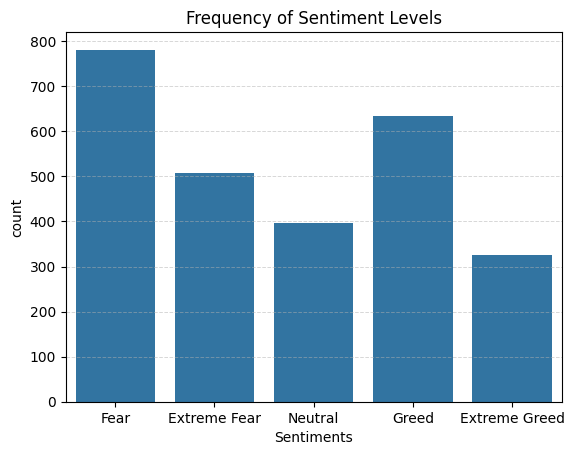

In [20]:
plt.Figure(figsize=(10,6))
sns.countplot(data=df1, x='classification')
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.5, linewidth=0.7)
plt.title("Frequency of Sentiment Levels")
plt.xlabel("Sentiments")

### **Insights**
- The above countplot shows you the frequency of each market sentiment.
- Fear is at the top, followed by Greed and Extreme Fear, whereas Neutral and Extreme Greed are almost at the same level.
---

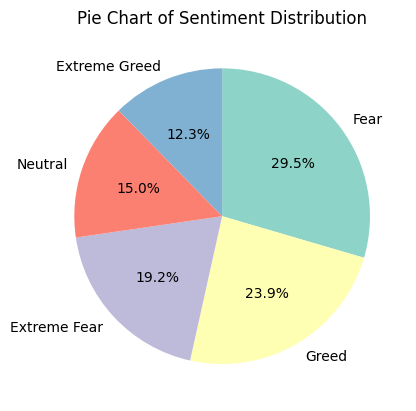

In [ ]:
sentiment_counts = df1['classification'].value_counts()

plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,  
    autopct='%1.1f%%',              
    startangle=90,
    counterclock=False,
    colors=plt.cm.Set3.colors       
)

plt.title("Pie Chart of Sentiment Distribution")
plt.show()

### **Insights**
- The above pie chart shows you the percentage distribution of each market sentiment
---

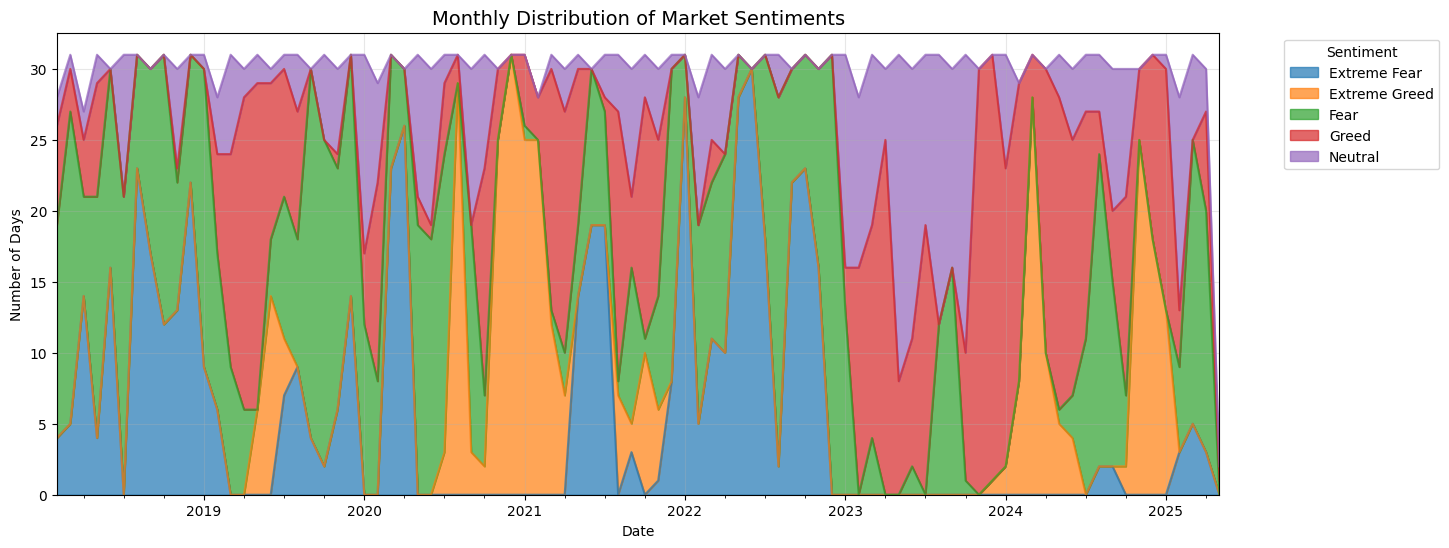

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])

# Resample by month and count sentiment occurrences
sentiment_monthly = (
    df1.groupby(['classification', pd.Grouper(key='date', freq='ME')])
       .size()
       .unstack(fill_value=0)
       .T   # transpose for plotting
)

# Plot stacked area
sentiment_monthly.plot.area(figsize=(15,6), alpha=0.7)

plt.title("Monthly Distribution of Market Sentiments", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Days")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

### **How to read the above stacked area chart**
- The X-axis denotes the months from 2018 -> 2025, each step is a month with aggregated counts.
- The Y-axis shows how many days of each sentiment occurred in that month.
- One sentiment’s area is stacked on top of the other.
- The area is continuous and filled, so months are not separated by lines. It looks like one smooth shape spreading across time.

### **Insights from the chart**
**2018-2019**
- Dominated by Fear and Extreme Fear sentiments with minimal Greed periods.

**2019-2020**
- We can see a major shift to Extreme Greed dominance, and again ending with Fear sentiment days.

**2020-2021**
- 2020 started with Extreme Fear which is evident because of 'Covid Pandemic', but soon ended with Extreme Greed.

**2021-2022**
- Continued Extreme Greed dominance for most of the year with few months of Fear.

**2022-2023**
- Sharp reversal to Fear and Extreme Fear dominance, clear shift from the optimistic 2021 environment.

**2023-2024**
- More balanced distribution with increased Neutral sentiment, less extreme sentiment concentration compared to previous years.

**2024-2025**
- Greed dominance for several months with notable spikes of Fear in mid 2024 and start of 2025.
---

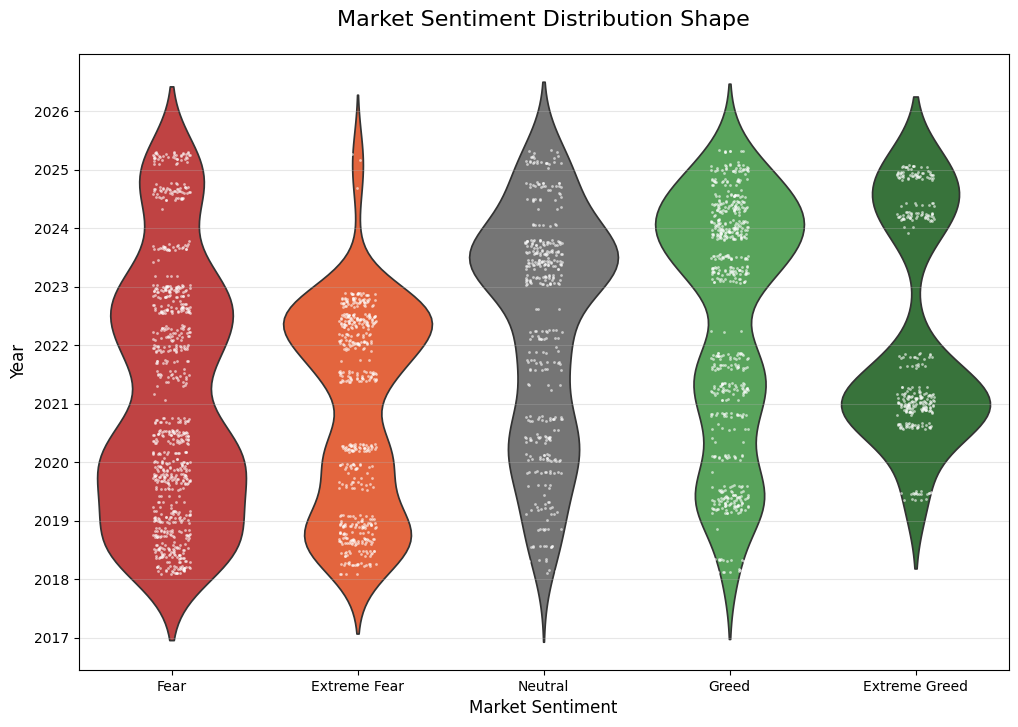

In [42]:
plt.figure(figsize=(12, 8))
colors = ['#d32f2f', '#ff5722', '#757575', '#4caf50', '#2e7d32']
sns.violinplot(data=df1, x='classification', y='date', hue='classification', inner=None, palette=colors, legend=False)
sns.stripplot(data=df1, x='classification', y='date', color='white', alpha=0.6, size=2)
plt.title("Market Sentiment Distribution Shape", fontsize=16, pad=20)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.grid(axis='y', alpha=0.3)

### **How to read the above Violin Plot**
- The violin plot shows the density distribution of each market sentiment across the 2018-2025 timeline.
- The width of each "violin" shape indicates how frequently that sentiment occurred during specific years - wider sections mean higher density/frequency of occurrences
- The white data points represent individual actual sentiment recordings scattered throughout the timeline, with their clustering patterns confirming the density distributions

### **Insights**
- Fear shows high density around 2018-2020 and 2022-2023
- Extreme Fear shows high density from mid 2021 to the start of 2023
- Neutral shows high density from 2023-2024
- Greed shows high density from 2023-2025
- Extreme Greed shows high density around 2020-2021
---